## Projeto Big Data

Julio Sales <br/>
Mácio Matheus<br/>
Victor Outtes

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

### Inicializando o contexto e a sessão do Spark

In [2]:
import findspark
findspark.init()

import pyspark
sc = pyspark.SparkContext(appName="projeto")

from pyspark.conf import SparkConf
session = pyspark.sql.SparkSession.builder.config(conf=SparkConf())
spark = session.getOrCreate()

from pyspark.sql.functions import monotonically_increasing_id

### Leitura da base de dados que está no cluster Hadoop

In [3]:
googleDf = spark.read.load('GOOG.csv', format='csv', inferSchema='true', header='true', sep=',')

root
 |-- Date: timestamp (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)

+-------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+
|summary|              Open|              High|              Low|            Close|        Adj Close|           Volume|
+-------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+
|  count|              3492|              3492|             3492|             3492|             3492|             3492|
|   mean|415.65481135652954| 419.3307963845929|411.6767180813292|415.5829676162661|415.5829676162661| 7711175.20045819|
| stddev|  266.373176551548|268.19944818596525|264.5360595811659|266.5069796854434|266.5069796854434|8303339.430077713|
|    min|  

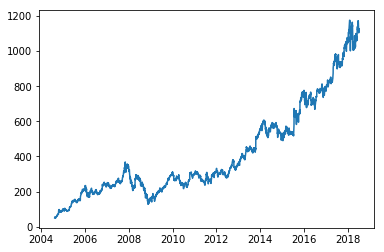

In [4]:
googleDf.printSchema()
googleDf.describe().show()
plt.plot([i[0] for i in googleDf.select('Date').collect()], [i[0] for i in googleDf.select('Close').collect()])

### Criando uma view temporária com as colunas 'data', 'fechamento (d - 3)', 'fechamento (d - 2)', 'fechamento (d - 1)' e 'fechamento (d)', as que interessam para a predição

<strong>View temporaria para D</strong>

In [5]:
googleDf.createOrReplaceTempView('googleCloseView')
googleCloseView = spark.sql('select Date, Close as D from googleCloseView where Date > "2004-08-24"').drop('Date')
totalDias = googleCloseView.count()
print('Total de dias: ', totalDias)
googleCloseView.show()

Total de dias:  3489
+---------+
|        D|
+---------+
|52.096165|
|52.657513|
|53.606342|
|52.732029|
|50.675404|
| 50.85424|
| 49.80109|
|50.427021|
|49.681866|
|50.461796|
|50.819469|
|50.824436|
|52.324677|
|53.402668|
|55.384777|
|55.638126|
|56.616764|
|58.365391|
|59.294346|
|58.539257|
+---------+
only showing top 20 rows



<strong>Criando outra view para capturar D-1</strong>

In [6]:
googleDf.createOrReplaceTempView('googleCloseViewD_1')
googleCloseViewD_1 = spark.sql('select Date, Close as D_1 from googleCloseViewD_1 where Date > "2004-08-23"').limit(totalDias).drop('Date')
print('Total de dias: ', googleCloseViewD_1.count())
googleCloseViewD_1.show()

Total de dias:  3489
+---------+
|      D_1|
+---------+
|54.346527|
|52.096165|
|52.657513|
|53.606342|
|52.732029|
|50.675404|
| 50.85424|
| 49.80109|
|50.427021|
|49.681866|
|50.461796|
|50.819469|
|50.824436|
|52.324677|
|53.402668|
|55.384777|
|55.638126|
|56.616764|
|58.365391|
|59.294346|
+---------+
only showing top 20 rows



<strong>Criando outra view para capturar D-2</strong>

In [7]:
googleDf.createOrReplaceTempView('googleCloseViewD_2')
googleCloseViewD_2 = spark.sql('select Date, Close as D_2 from googleCloseViewD_2 where Date > "2004-08-20"').limit(totalDias).drop('Date')
print('Total de dias: ', googleCloseViewD_2.count())
googleCloseViewD_2.show()

Total de dias:  3489
+---------+
|      D_2|
+---------+
| 53.80505|
|54.346527|
|52.096165|
|52.657513|
|53.606342|
|52.732029|
|50.675404|
| 50.85424|
| 49.80109|
|50.427021|
|49.681866|
|50.461796|
|50.819469|
|50.824436|
|52.324677|
|53.402668|
|55.384777|
|55.638126|
|56.616764|
|58.365391|
+---------+
only showing top 20 rows



<strong>Criando outra view para capturar D-3</strong>

In [8]:
googleDf.createOrReplaceTempView('googleCloseViewD_3')
googleCloseViewD_3 = spark.sql('select Date, Close as D_3 from googleCloseViewD_3 where Date > "2004-08-19"').limit(totalDias).drop('Date')
print('Total de dias: ', googleCloseViewD_3.count())
googleCloseViewD_3.show()

Total de dias:  3489
+---------+
|      D_3|
+---------+
|49.845802|
| 53.80505|
|54.346527|
|52.096165|
|52.657513|
|53.606342|
|52.732029|
|50.675404|
| 50.85424|
| 49.80109|
|50.427021|
|49.681866|
|50.461796|
|50.819469|
|50.824436|
|52.324677|
|53.402668|
|55.384777|
|55.638126|
|56.616764|
+---------+
only showing top 20 rows



<strong>Pegando as datas</strong>

In [9]:
googleDf.createOrReplaceTempView('googleCloseViewDates')
googleCloseViewDates = spark.sql('select Date from googleCloseView where Date > "2004-08-24"')
totalDias = googleCloseViewDates.count()
print('Total de dias: ', totalDias)
googleCloseViewDates.show()

Total de dias:  3489
+-------------------+
|               Date|
+-------------------+
|2004-08-24 00:00:00|
|2004-08-25 00:00:00|
|2004-08-26 00:00:00|
|2004-08-27 00:00:00|
|2004-08-30 00:00:00|
|2004-08-31 00:00:00|
|2004-09-01 00:00:00|
|2004-09-02 00:00:00|
|2004-09-03 00:00:00|
|2004-09-07 00:00:00|
|2004-09-08 00:00:00|
|2004-09-09 00:00:00|
|2004-09-10 00:00:00|
|2004-09-13 00:00:00|
|2004-09-14 00:00:00|
|2004-09-15 00:00:00|
|2004-09-16 00:00:00|
|2004-09-17 00:00:00|
|2004-09-20 00:00:00|
|2004-09-21 00:00:00|
+-------------------+
only showing top 20 rows



<strong>Fazendo JOIN de todas as views!</strong>

In [10]:
googleCloseViewD_3 = googleCloseViewD_3.withColumn("id", monotonically_increasing_id())
googleCloseViewD_2 = googleCloseViewD_2.withColumn("id", monotonically_increasing_id())
googleCloseViewD_1 = googleCloseViewD_1.withColumn("id", monotonically_increasing_id())
googleCloseView = googleCloseView.withColumn("id", monotonically_increasing_id())
googleCloseViewDates = googleCloseViewDates.withColumn("id", monotonically_increasing_id())

In [11]:
googleJoined = googleCloseViewDates.join(googleCloseViewD_3, "id", "outer").join(googleCloseViewD_2, "id", "outer")\
    .join(googleCloseViewD_1, "id", "outer").join(googleCloseView, "id", "outer").drop("id")
googleJoinedSorted = googleJoined.orderBy('Date')
googleJoinedSorted.show()

+-------------------+---------+---------+---------+---------+
|               Date|      D_3|      D_2|      D_1|        D|
+-------------------+---------+---------+---------+---------+
|2004-08-24 00:00:00|49.845802| 53.80505|54.346527|52.096165|
|2004-08-25 00:00:00| 53.80505|54.346527|52.096165|52.657513|
|2004-08-26 00:00:00|54.346527|52.096165|52.657513|53.606342|
|2004-08-27 00:00:00|52.096165|52.657513|53.606342|52.732029|
|2004-08-30 00:00:00|52.657513|53.606342|52.732029|50.675404|
|2004-08-31 00:00:00|53.606342|52.732029|50.675404| 50.85424|
|2004-09-01 00:00:00|52.732029|50.675404| 50.85424| 49.80109|
|2004-09-02 00:00:00|50.675404| 50.85424| 49.80109|50.427021|
|2004-09-03 00:00:00| 50.85424| 49.80109|50.427021|49.681866|
|2004-09-07 00:00:00| 49.80109|50.427021|49.681866|50.461796|
|2004-09-08 00:00:00|50.427021|49.681866|50.461796|50.819469|
|2004-09-09 00:00:00|49.681866|50.461796|50.819469|50.824436|
|2004-09-10 00:00:00|50.461796|50.819469|50.824436|52.324677|
|2004-09

### Preparando a base para aplicar o modelo de regressão

In [14]:
from pyspark.ml.feature import VectorAssembler

In [45]:
vectorAssembler = VectorAssembler(inputCols=['D_3','D_2','D_1'], outputCol='features')
googleDataFrame = vectorAssembler.transform(googleJoinedSorted)
googleDataFrame = googleDataFrame.select(['Date', 'features', 'D'])
googleDataFrame.show(3)

+-------------------+--------------------+---------+
|               Date|            features|        D|
+-------------------+--------------------+---------+
|2004-08-24 00:00:00|[49.845802,53.805...|52.096165|
|2004-08-25 00:00:00|[53.80505,54.3465...|52.657513|
|2004-08-26 00:00:00|[54.346527,52.096...|53.606342|
+-------------------+--------------------+---------+
only showing top 3 rows



<strong>Separando a base de treinamento e teste</strong>

In [48]:
splits = googleDataFrame.randomSplit([0.7, 0.3])
trainDataFrame = splits[0]
testDataFrame = splits[1]

print('Tamanho da base de treinamento: ', trainDataFrame.count())
print('Tamanho da base de teste: ', testDataFrame.count())

Tamanho da base de treinamento:  2432
Tamanho da base de teste:  1057


<strong>Utilizando regressão linear</strong>

<strong>Coeficientes:</strong> parâmetros que definem a reta (Y = a + b1x1 + b2x2 + b3x3) <br/>
<strong>Intercepto:</strong> valor de intersecção da reta com o eixo Y (a)

In [18]:
from pyspark.ml.regression import LinearRegression

In [19]:
linearRegression = LinearRegression(featuresCol='features', labelCol='D', maxIter=10, regParam=0.3, elasticNetParam=0.8)
linearRegressionModel = linearRegression.fit(trainDataFrame)
print('Coeficientes: ', str(linearRegressionModel.coefficients))
print('Intercepto: ', str(linearRegressionModel.intercept))

Coeficientes:  [0.004957822422102755,0.15080801032317556,0.8437491094468569]
Intercepto:  0.6678164762644825


<strong>RMSE</strong> mede as diferenças entre os valores preditos e os reais.<br/>
<strong>R^2 (coeficiente de determinação)</strong> indica o quanto o modelo consegue explicar os valores observados. Quanto maior melhor (valor entre 0 e 1).

Observando o desempenho na base de teste:

In [50]:
from pyspark.ml.evaluation import RegressionEvaluator

predictions = linearRegressionModel.transform(testDataFrame)
predictions.select("Date", "prediction","D","features").show(5)

evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='D', metricName='rmse')
print('RMSE na base de teste: ', evaluator.evaluate(predictions))

evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='D', metricName='r2')
print('R2 na base de teste: ', evaluator.evaluate(predictions))

+-------------------+------------------+---------+--------------------+
|               Date|        prediction|        D|            features|
+-------------------+------------------+---------+--------------------+
|2004-08-30 00:00:00|53.505751360707556|50.675404|[52.657513,53.606...|
|2004-09-02 00:00:00| 50.60790821834482|50.427021|[50.675404,50.854...|
|2004-09-08 00:00:00| 50.98734348834972|50.819469|[50.427021,49.681...|
|2004-09-14 00:00:00|   53.869229000915|55.384777|[50.824436,52.324...|
|2004-09-20 00:00:00|58.727668633415455|59.294346|[55.638126,56.616...|
+-------------------+------------------+---------+--------------------+
only showing top 5 rows

RMSE na base de teste:  7.682465208777845
R2 na base de teste:  0.999159558751692


### Analisando as previsões visualmente

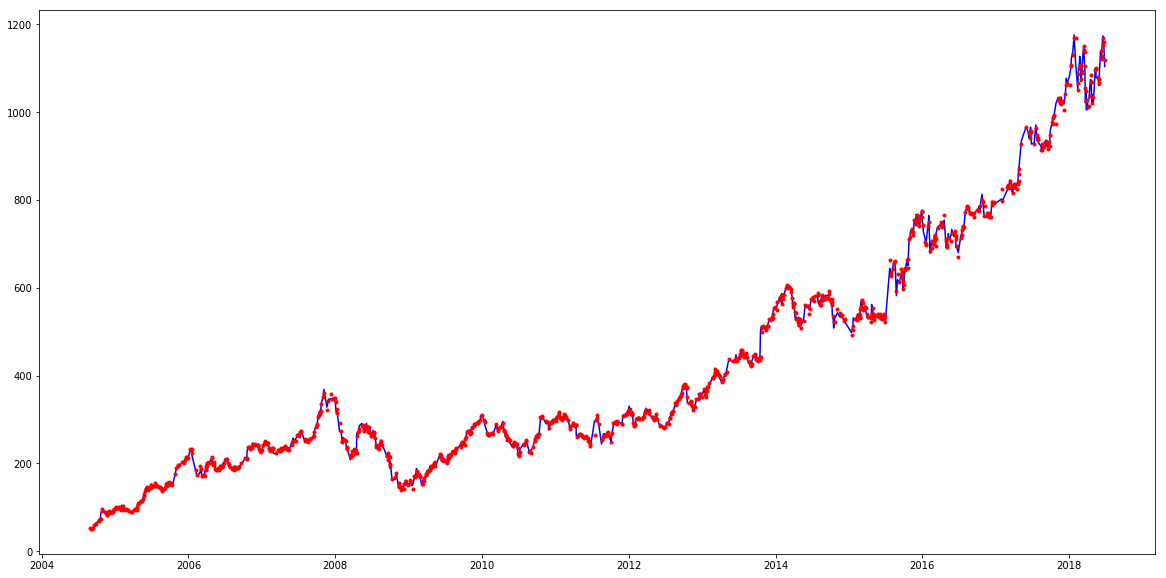

In [52]:
predictionsSorted = predictions.orderBy('Date')

plt.figure(figsize=(20,10))
plt.plot([i[0] for i in predictionsSorted.select('Date').collect()], \
         [i[0] for i in predictionsSorted.select('D').collect()], 'b-')
plt.plot([i[0] for i in predictionsSorted.select('Date').collect()], \
         [i[0] for i in predictionsSorted.select('prediction').collect()], 'r.')